# NYC Real Estate Price Prediction

## Objective

We will predict the real estate price to help the people buy and sell at a reasonable price.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
def load_data():
    df_mh=pd.read_excel("rollingsales_manhattan.xls",skiprows=4)
    df_mh["AREA"]="MH"
    df_bx=pd.read_excel("rollingsales_bronx.xls",skiprows=4)
    df_bx["AREA"]="BX"
    df=pd.concat([df_mh,df_bx])

    df.columns = df.columns.str.replace(' ', '_')
    df=df.drop(columns=['EASE-MENT'])# all the values in this column is nan.
    df['not_apartment']=df['APARTMENT_NUMBER'].isna()# ture: it is not an apartment. false: it is an apartment.
    df=df.drop(columns=['APARTMENT_NUMBER','ADDRESS','BUILDING_CLASS_AT_PRESENT'])
    df=df.dropna()
    return df

In [3]:
df=load_data()
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,AREA,not_apartment
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809,2018-05-22,MH,True
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2018-05-23,MH,True
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000,2018-12-03,MH,True
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,10009.0,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0,2018-04-25,MH,True
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,10009.0,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2018-11-29,MH,True


In [4]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['SALE_PRICE']>0]
    X = df_select.drop(['SALE_PRICE'], axis=1)
    Y = df_select['SALE_PRICE']
    return X,Y

In [5]:
# select neighborhood / BLOCK + GROSS_SQUARE_FEET
features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET','SALE_PRICE']
# features_selected=['BLOCK','GROSS_SQUARE_FEET','SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
# X=pd.get_dummies(X, columns=['BLOCK'])
X.head()

,GROSS_SQUARE_FEET,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,NEIGHBORHOOD_CASTLE HILL/UNIONPORT,NEIGHBORHOOD_CHELSEA,...,NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (96-116),NEIGHBORHOOD_VAN CORTLANDT PARK,NEIGHBORHOOD_WAKEFIELD,NEIGHBORHOOD_WASHINGTON HEIGHTS LOWER,NEIGHBORHOOD_WASHINGTON HEIGHTS UPPER,NEIGHBORHOOD_WESTCHESTER,NEIGHBORHOOD_WILLIAMSBRIDGE,NEIGHBORHOOD_WOODLAWN
0,2183.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5200.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,17478.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6294.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14588.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def model_score(model):
    model=model
    model.fit(X_train, Y_train)
    score=model.score(X_test, Y_test)
    return score

In [8]:
model=RandomForestRegressor()

print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'SALE_PRICE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.49368871363772643
AVG_AUC: 0.5422930914401068


In [9]:
model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'SALE_PRICE']
LinearRegression:0.49453866665680446
AVG_AUC: 0.5363397553624376


only tried on manhattan and bronx, only one year
result:
    block+gross_square_feet
        random_forest(low,cost too much time to calculate auc) >linearregression(very low,near 0, negative auc)
    neighborhood+gross_square_feet:
        random_fores (very unstable)
        linearregression (auc very low, near 0)

# Discussion #1





As we showed, the result of analysis is not great.
So, we need to further look at the data.

Let's begin from the SALE_PRICE data.

In [10]:
df[df["SALE_PRICE"]>0]["SALE_PRICE"].describe()

count    1.850900e+04
mean     3.177423e+06
std      2.690026e+07
min      1.000000e+00
25%      4.750000e+05
50%      7.980000e+05
75%      1.790000e+06
max      2.397502e+09
Name: SALE_PRICE, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b358ce8da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b358e80470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b358ce8978>],
 'medians': [<matplotlib.lines.Line2D at 0x1b358e80b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b358e80e48>],
 'means': []}

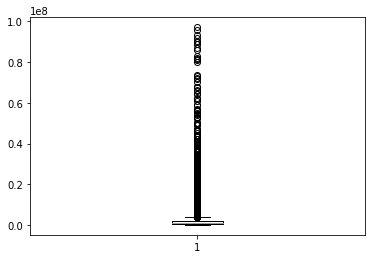

In [11]:
fig, ax = plt.subplots()
ax.boxplot(df[(df["SALE_PRICE"]>10000) & (df["SALE_PRICE"]<1.0e+08)]["SALE_PRICE"])

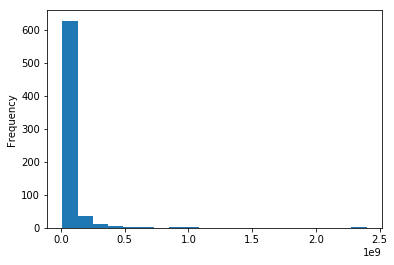

In [12]:
df[df["SALE_PRICE"]>10000000]["SALE_PRICE"].plot.hist(bins=20);


As I showed here, the histgram is super-right long tail.

So, I decided to take log to the data.


In [13]:
df["SALE_PRICE"].apply(np.log10).head()

0    6.685277
1        -inf
2    6.785330
3        -inf
4        -inf
Name: SALE_PRICE, dtype: float64

In [14]:
df["SALE_PRICE"] = df["SALE_PRICE"].replace(0, np.NaN)
df["Logged_SALE_PRICE"] = df["SALE_PRICE"].apply(np.log10)

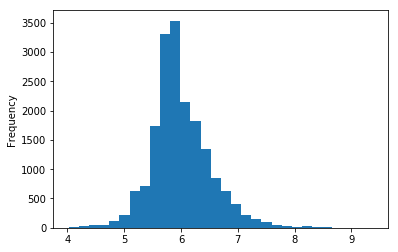

In [15]:
df[df["Logged_SALE_PRICE"]>4]["Logged_SALE_PRICE"].plot.hist(bins=30);


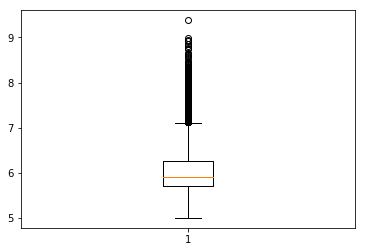

In [16]:
fig, ax = plt.subplots()
ax.boxplot(df[(df["Logged_SALE_PRICE"]>5)]["Logged_SALE_PRICE"]);

Then re-run the regression.

In [17]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['Logged_SALE_PRICE']>6]
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET','Logged_SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def model_score(model):
    model=model
    model.fit(X_train, Y_train)
    score=model.score(X_test, Y_test)
    return score



In [18]:
model=RandomForestRegressor()

print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'Logged_SALE_PRICE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.6049120517122493
AVG_AUC: 0.5865785602053124


In [19]:
model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'Logged_SALE_PRICE']
LinearRegression:0.2460541539025083
AVG_AUC: 0.19946882709843944


# summary
So what we did is, 

1.log transformation

2.filtered out $log(\text{SALE_PRICE}) \leq{} 5$ which means the price under $\$10^5 = \$ 100,000$



# Next, let's try another feature.
I am interested in the YEAR passed in the data.

so We will make a new variable named "YEARS"

which is a difference of SALE YEAR and BUILD YEAR.


In [20]:
sum(df["SALE_DATE"].isna())


0

In [21]:
df["YEAR_BUILT"] = df["YEAR_BUILT"].replace(0, np.NaN)
df["SALE_DATE"] = df["SALE_DATE"].replace(0, np.NaN)


In [22]:
df["YEARS"] = df["SALE_DATE"].dt.year - df["YEAR_BUILT"]
df["YEARS"].head()

0    158.0
1    158.0
2    118.0
3    119.0
4    118.0
Name: YEARS, dtype: float64

In [23]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['Logged_SALE_PRICE']>6]
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET', "YEARS",'Logged_SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X.head()


model = RandomForestRegressor() 
print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.5931009071415029
AVG_AUC: 0.584622510753205
features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE']
LinearRegression:0.2460541539025083
AVG_AUC: 0.19946882709843944


# Further, let's add the ZIPCODE as an dummy.



In [24]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['Logged_SALE_PRICE']>6]
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET', "YEARS",'Logged_SALE_PRICE', "ZIP_CODE"]
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X=pd.get_dummies(X, columns=["ZIP_CODE"])
X.head()


model = RandomForestRegressor() 
print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE', 'ZIP_CODE']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.5933029796534159
AVG_AUC: 0.5892112966622355
features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE', 'ZIP_CODE']
LinearRegression:0.2460541539025083
AVG_AUC: 0.19946882709843944


In [25]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[df_select['Logged_SALE_PRICE']>6]
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

df["ZIP_CODE"]=df["ZIP_CODE"].astype(int).astype(str)
features_selected=['NEIGHBORHOOD','GROSS_SQUARE_FEET', "YEARS",'Logged_SALE_PRICE', "ZIP_CODE", "TOTAL_UNITS", "BUILDING_CLASS_CATEGORY"]
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X=pd.get_dummies(X, columns=["ZIP_CODE"])
X=pd.get_dummies(X, columns=["BUILDING_CLASS_CATEGORY"])

#X=pd.get_dummies(X, columns=["BLOCK"])
X.head()


model = RandomForestRegressor() 
print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)

model=LinearRegression()
print("features_selected:", features_selected)
print("LinearRegression:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:",avg_auc)

features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE', 'ZIP_CODE', 'TOTAL_UNITS', 'BUILDING_CLASS_CATEGORY']


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor:0.5972368015172251
AVG_AUC: 0.5884213864303539
features_selected: ['NEIGHBORHOOD', 'GROSS_SQUARE_FEET', 'YEARS', 'Logged_SALE_PRICE', 'ZIP_CODE', 'TOTAL_UNITS', 'BUILDING_CLASS_CATEGORY']
LinearRegression:0.2460541539025083
AVG_AUC: 0.19946882709843944


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7402 entries, 0 to 7695
Columns: 188 entries, GROSS_SQUARE_FEET to BUILDING_CLASS_CATEGORY_47 CONDO NON-BUSINESS STORAGE
dtypes: float64(3), uint8(185)
memory usage: 1.5 MB


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE', 'AREA',
       'not_apartment', 'Logged_SALE_PRICE', 'YEARS'],
      dtype='object')

Prediction,	Actual data
[[5.901452   5.78281935]
 [5.87355995 6.27852496]
 [6.00188042 6.39794001]
 ...
 [5.83375935 5.86332286]
 [5.90645204 5.6580114 ]
 [5.85019977 6.21973957]]


Text(0, 0.5, 'Actual data')

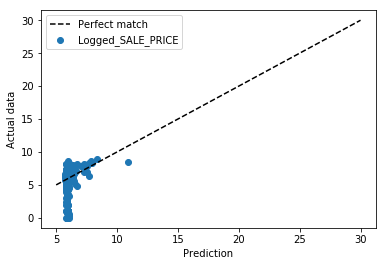

In [29]:
# install it on Terminal:
# pip3 install dtreeviz
# or
#pip install dtreeviz

from dtreeviz.trees import *
from sklearn import tree
from graphviz import Digraph

# pip install pydot
import pydot

# pip install pydotplus
import pydotplus
#from IPython.configdisplay import Image

df_clf=df.dropna(how="any")
target = "Logged_SALE_PRICE"
features_selected=['TOTAL_UNITS', 'GROSS_SQUARE_FEET','YEARS']



df_train, df_test = train_test_split(df_clf, test_size=.2, random_state=42)
X_train = df_train[features_selected]
X_test = df_test[features_selected]
Y_train = df_train[target]
Y_test = df_test[target]

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
# regr.coef_
print("Prediction,\tActual data")
print(np.column_stack([Y_pred,Y_test]))
plt.scatter(Y_pred,Y_test)
plt.plot([5,30], [5,30], 'k--', label="Perfect match")
plt.legend()
plt.xlabel("Prediction")
plt.ylabel("Actual data")


# Investigate What is the data alike


In [30]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,...,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,AREA,not_apartment,Logged_SALE_PRICE,YEARS
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009,1.0,0.0,1.0,...,2183.0,1860.0,1,A4,4844809.0,2018-05-22,MH,True,6.685277,158.0
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,10009,1.0,0.0,1.0,...,2183.0,1860.0,1,A4,NaN,2018-05-23,MH,True,NaN,158.0
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,10009,1.0,0.0,1.0,...,5200.0,1900.0,1,A4,6100000.0,2018-12-03,MH,True,6.785330,118.0
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,10009,2.0,0.0,2.0,...,4764.0,1899.0,1,B1,NaN,2018-04-25,MH,True,NaN,119.0
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,10009,2.0,0.0,2.0,...,4520.0,1900.0,1,B9,NaN,2018-11-29,MH,True,NaN,118.0


In [31]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE', 'AREA',
       'not_apartment', 'Logged_SALE_PRICE', 'YEARS'],
      dtype='object')

NameError: name 'predictors' is not defined

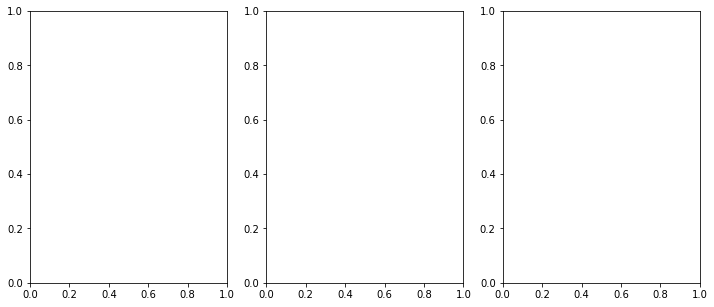

In [33]:
rows = 1
cols = 3
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(4*cols, 5*rows))
axs = axs.flatten()

for i in range(0,len(predictors)):
    df.boxplot(target, predictors[i], grid=False, ax=axs[i], sym='k.')
plt.tight_layout()


for i in features_selected:
    df.plot.scatter(x=i, y="SALE_PRICE")

    


'TOTAL_UNITS'

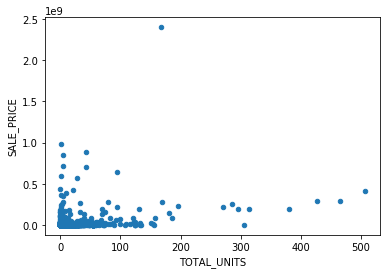

In [49]:
df.plot.scatter(x=features_selected[0], y="SALE_PRICE")


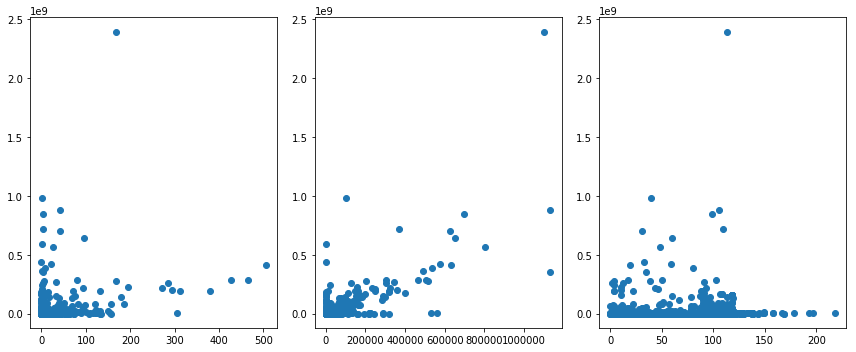

In [50]:
rows = 1
cols = 3
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(4*cols, 5*rows))
axs = axs.flatten()
j=0
for i in features_selected:
    axs[j].scatter(x=i, y="SALE_PRICE",data=df)
    j = j+1
plt.tight_layout()   


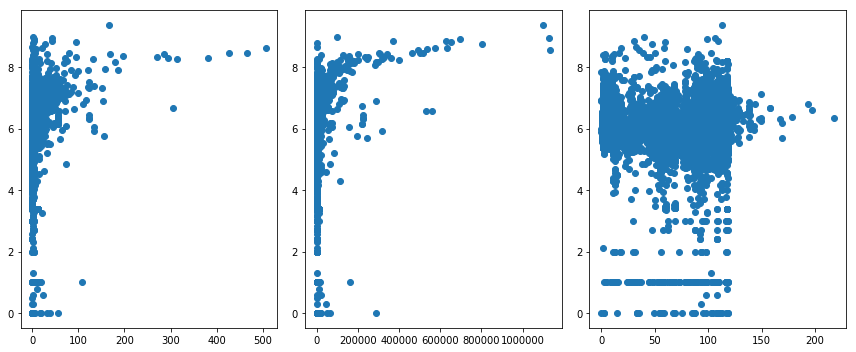

In [52]:

fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(4*cols, 5*rows))
axs = axs.flatten()
j=0
for i in features_selected:
    axs[j].scatter(x=i, y="Logged_SALE_PRICE",data=df)
    j = j+1
plt.tight_layout()   


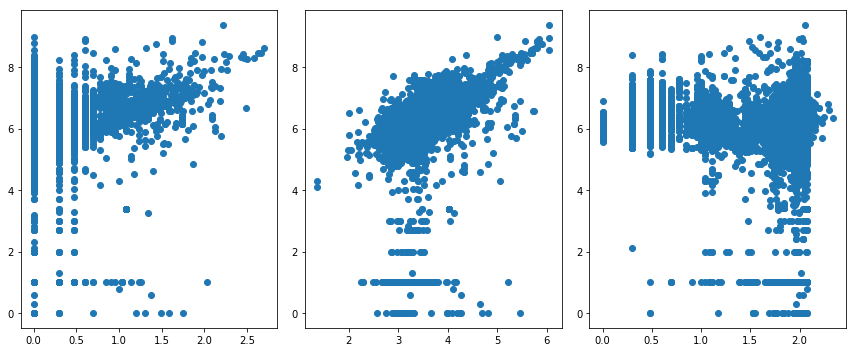

In [53]:
df["Logged_TOTAL_UNITS"] = df["TOTAL_UNITS"].replace(0,np.NaN).apply(np.log10)
df["Logged_GROSS_SQUARE_FEET"] = df["GROSS_SQUARE_FEET"].replace(0,np.NaN).apply(np.log10)
df["Logged_YEARS"] = df["YEARS"].replace(0,np.NaN).apply(np.log10)

logged_features_selected=['Logged_TOTAL_UNITS', 'Logged_GROSS_SQUARE_FEET', 'Logged_YEARS']


fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(4*cols, 5*rows))
axs = axs.flatten()
j=0
for i in logged_features_selected:
    axs[j].scatter(x=i, y="Logged_SALE_PRICE",data=df)
    j = j+1
plt.tight_layout()   



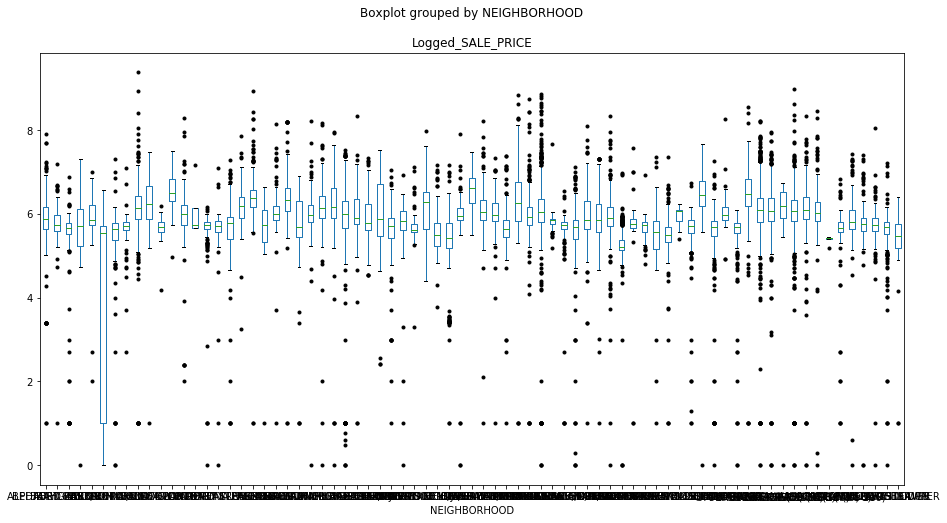

In [37]:
df.boxplot(target, "NEIGHBORHOOD", grid=False, sym='k.', figsize=(15,8))

In [38]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE', 'AREA',
       'not_apartment', 'Logged_SALE_PRICE', 'YEARS', 'Logged_TOTAL_UNITS',
       'Logged_GROSS_SQUARE_FEET', 'Logged_YEARS'],
      dtype='object')

In [39]:
df["SALE_MONTH"] = df["SALE_DATE"].dt.month.astype(int)

In [40]:
#'NEIGHBORHOOD'
forboxplot = ['BUILDING_CLASS_CATEGORY','TAX_CLASS_AT_PRESENT', 'ZIP_CODE',"SALE_MONTH",
              'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE','AREA','not_apartment',]

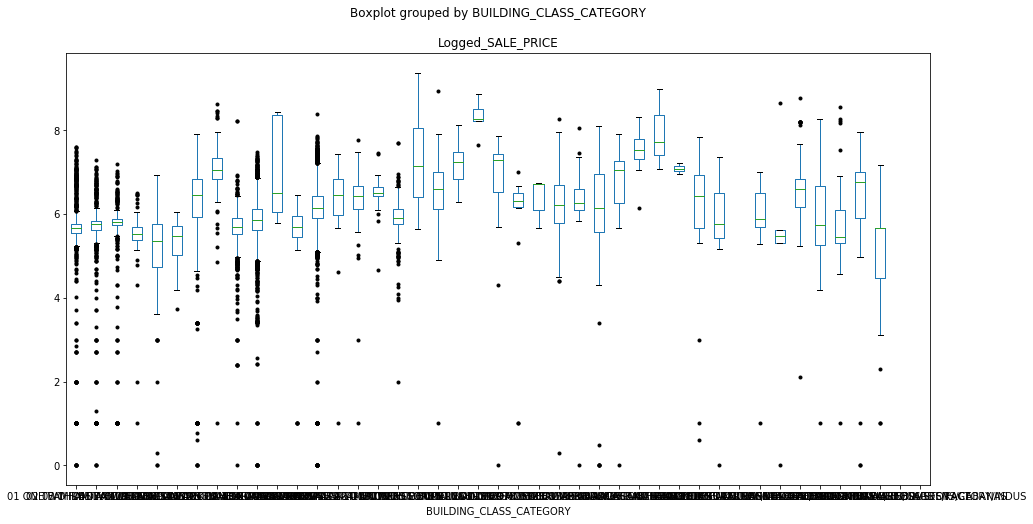

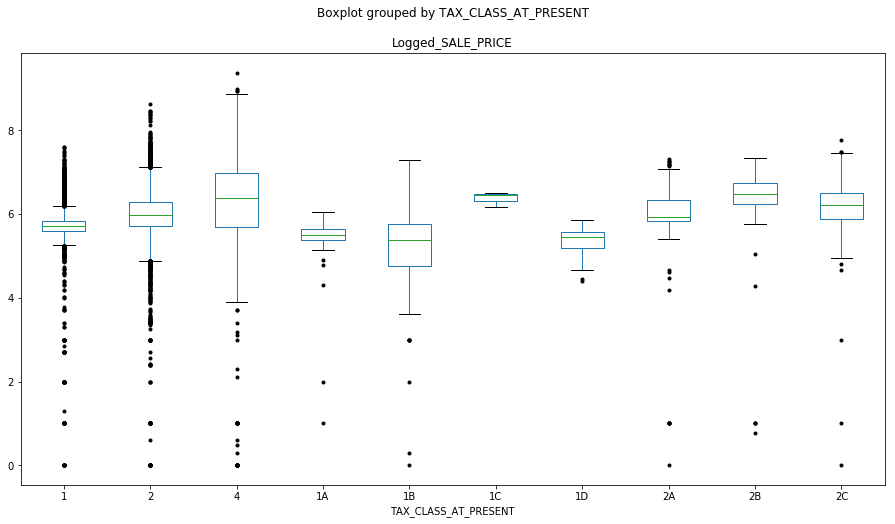

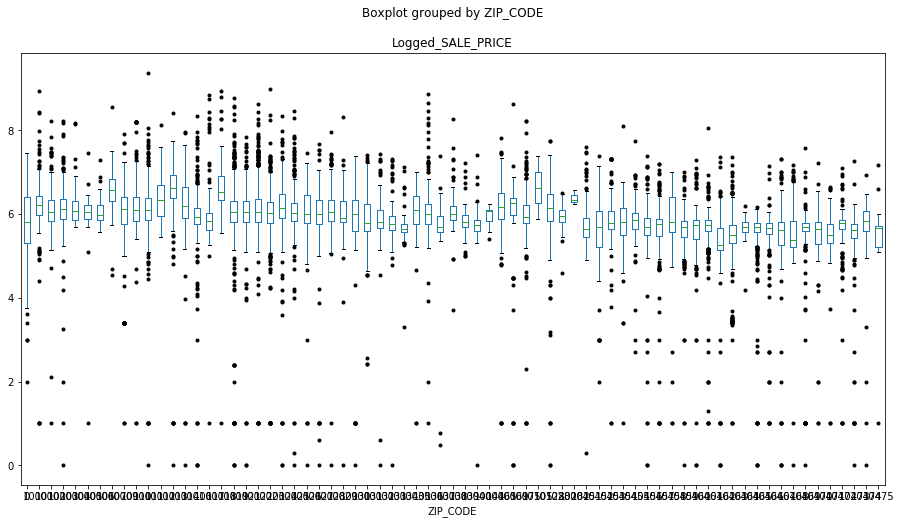

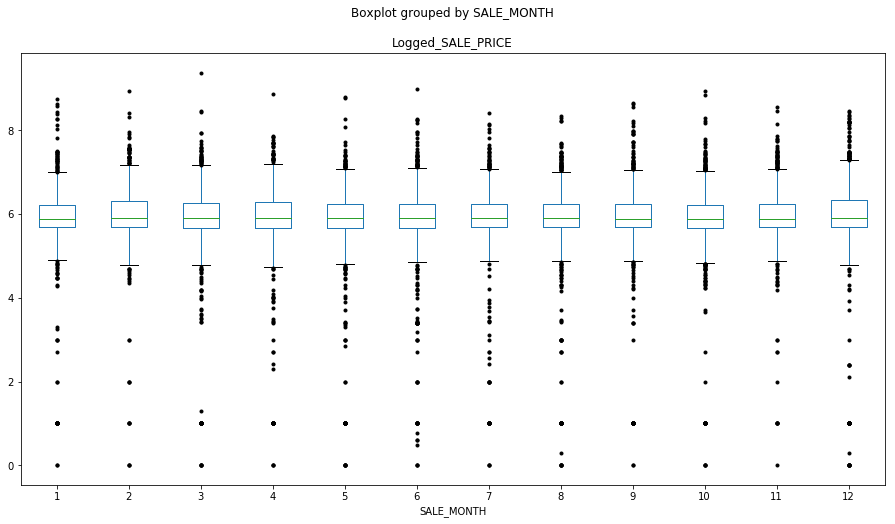

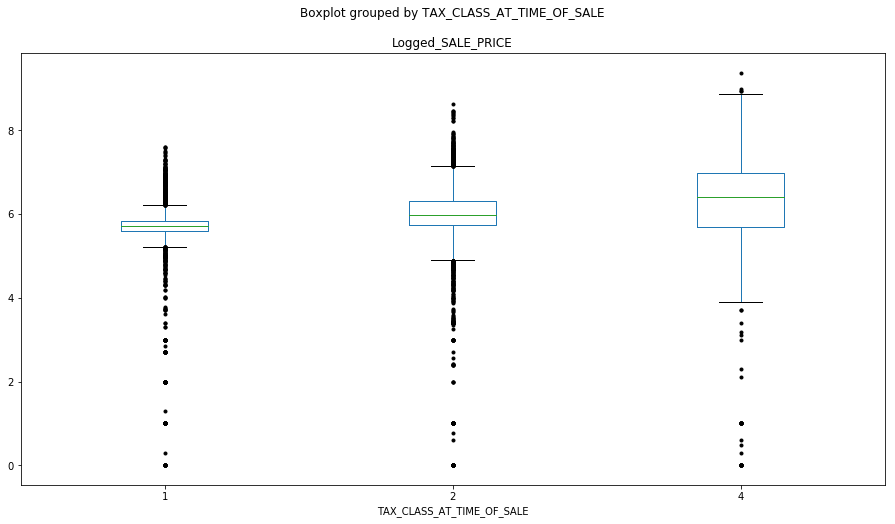

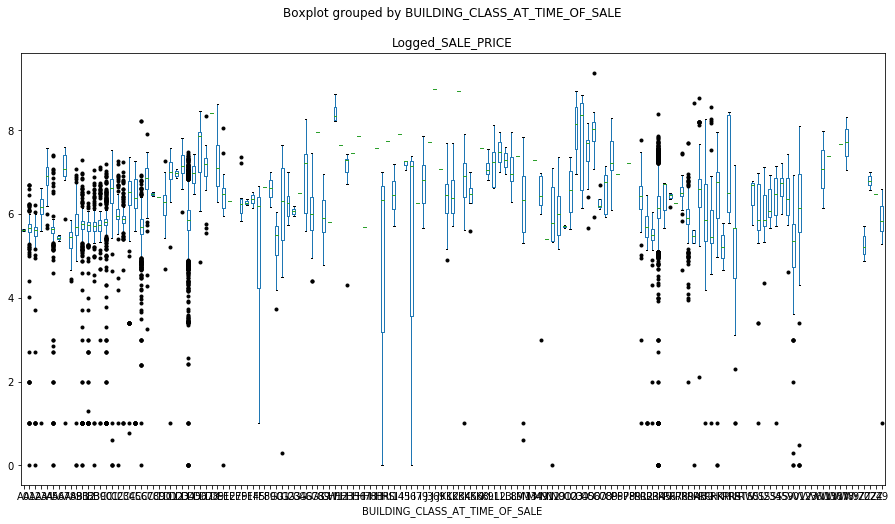

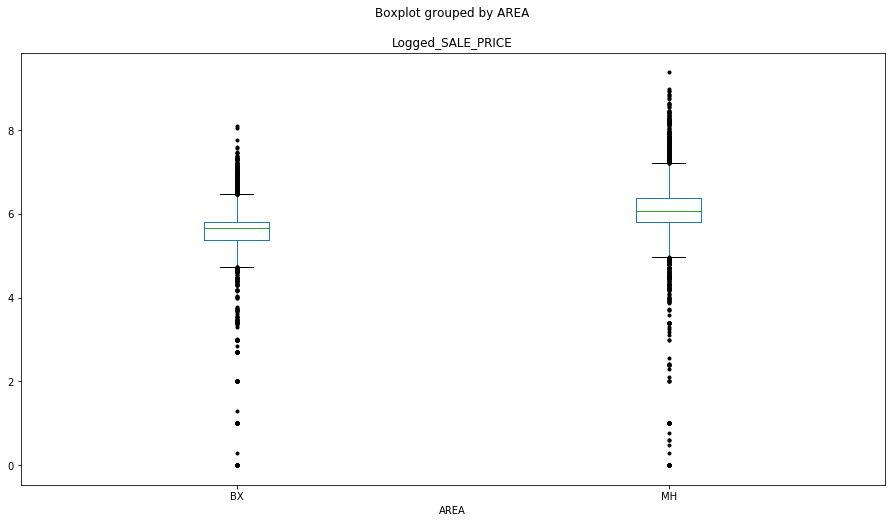

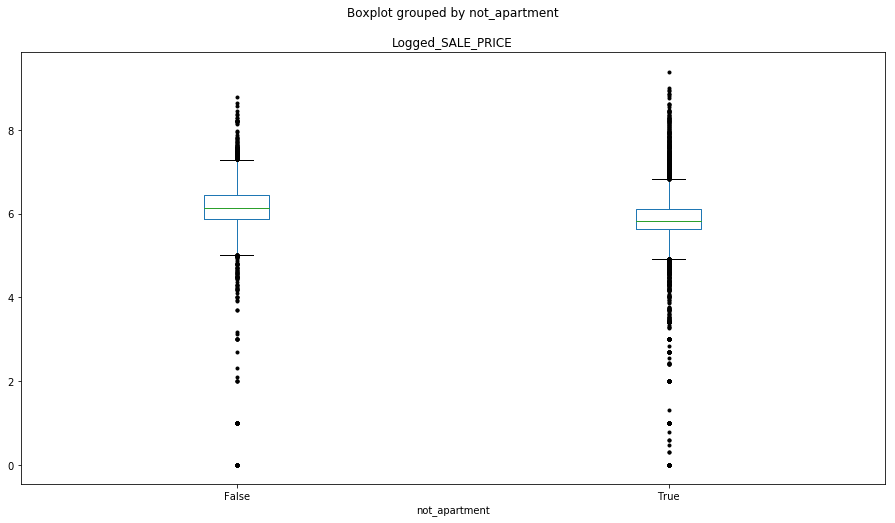

In [41]:
for i in forboxplot:
    df.boxplot(target, i, grid=False, sym='k.', figsize=(15,8))

In [55]:
def selec_features(features):
    df_select=df[features]
    df_select=df_select[(df_select['Logged_SALE_PRICE']>6) & (df_select['Logged_TOTAL_UNITS']>0)& (df_select['Logged_YEARS']>0)]
    df_select =  df_select.dropna(how="any")
    X = df_select.drop(['Logged_SALE_PRICE'], axis=1)
    Y = df_select['Logged_SALE_PRICE']
    return X,Y

features_selected=['NEIGHBORHOOD','Logged_TOTAL_UNITS', 'Logged_GROSS_SQUARE_FEET', 'Logged_YEARS', 'Logged_SALE_PRICE']
X,Y=selec_features(features_selected)
X=pd.get_dummies(X, columns=['NEIGHBORHOOD'])
X.head()


,Logged_TOTAL_UNITS,Logged_GROSS_SQUARE_FEET,Logged_YEARS,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_BATHGATE,NEIGHBORHOOD_BAYCHESTER,NEIGHBORHOOD_BEDFORD PARK/NORWOOD,NEIGHBORHOOD_BELMONT,NEIGHBORHOOD_BRONX PARK,NEIGHBORHOOD_BRONXDALE,...,NEIGHBORHOOD_UPPER EAST SIDE (59-79),NEIGHBORHOOD_UPPER EAST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (59-79),NEIGHBORHOOD_UPPER WEST SIDE (79-96),NEIGHBORHOOD_UPPER WEST SIDE (96-116),NEIGHBORHOOD_WAKEFIELD,NEIGHBORHOOD_WASHINGTON HEIGHTS LOWER,NEIGHBORHOOD_WASHINGTON HEIGHTS UPPER,NEIGHBORHOOD_WESTCHESTER,NEIGHBORHOOD_WILLIAMSBRIDGE
6,1.477121,4.242492,1.995635,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.342423,4.163996,1.944483,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1.204120,4.024814,2.071882,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.255273,4.027350,2.033424,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0.602060,3.736078,1.230449,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)

def model_score(model):
    model=model
    model.fit(X_train, Y_train)
    score=model.score(X_test, Y_test)
    return score

model=RandomForestRegressor()
print("features_selected:", features_selected)
print("RandomForestRegressor:"+str(model_score(model)))
avg_auc = cross_val_score(model, X_train,Y_train, cv=10, scoring="r2").mean()
print("AVG_AUC:", avg_auc)


features_selected: ['NEIGHBORHOOD', 'Logged_TOTAL_UNITS', 'Logged_GROSS_SQUARE_FEET', 'Logged_YEARS', 'Logged_SALE_PRICE']
RandomForestRegressor:0.6034907886436109


C:\Users\ryouen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AVG_AUC: 0.5653095052618391
